In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
titanic_data = pd.read_csv('tested.csv')

In [24]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
titanic_data.shape

(418, 12)

In [26]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [28]:
#checking null fields
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data.drop(columns=['Name'], inplace=True)
titanic_data.drop(columns=['Ticket'], inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [30]:
titanic_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

C:\Users\Nilima Sonawane\AppData\Local\Temp\ipykernel_10560\222116356.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_data, palette='Set1')


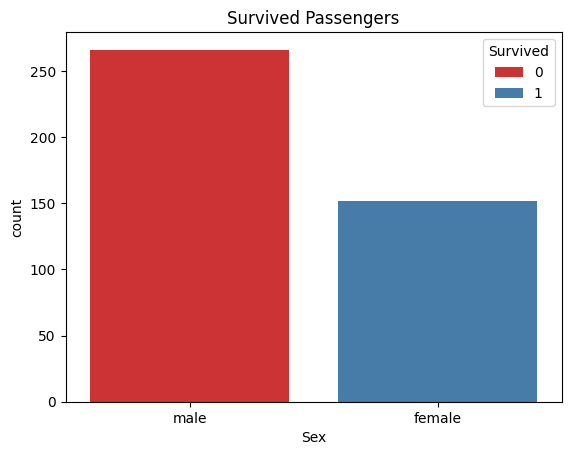

In [31]:
sns.countplot(x='Sex', data=titanic_data, palette='Set1')
plt.title('Survived Passengers')
plt.legend(title='Survived', loc='upper right', labels=['0', '1'])
plt.show()

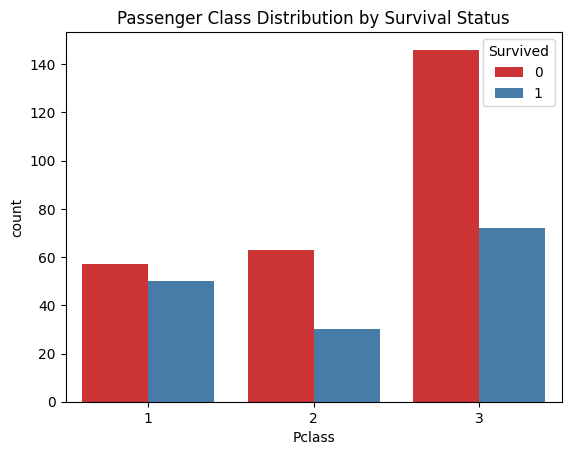

In [32]:
sns.countplot(x='Pclass', data=titanic_data, hue='Survived', palette='Set1')
plt.title("Passenger Class Distribution by Survival Status")
plt.legend(title='Survived', loc='upper right', labels=['0', '1'])
plt.show()

In [33]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

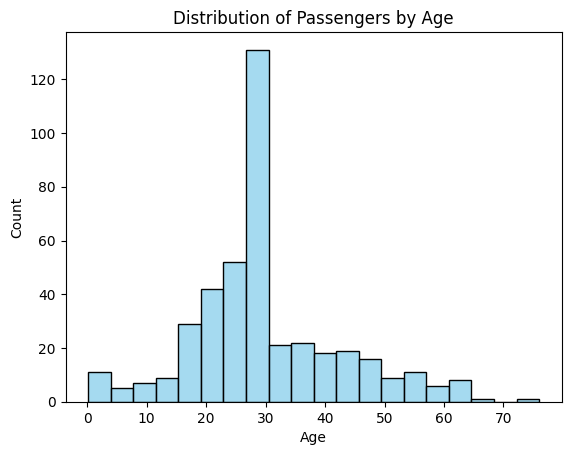

In [34]:
sns.histplot(titanic_data['Age'], bins=20, kde=False, color='skyblue')
plt.title("Distribution of Passengers by Age")
plt.show()

C:\Users\Nilima Sonawane\AppData\Local\Temp\ipykernel_10560\2765800692.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=titanic_data, palette='Set1')


<Axes: xlabel='SibSp', ylabel='count'>

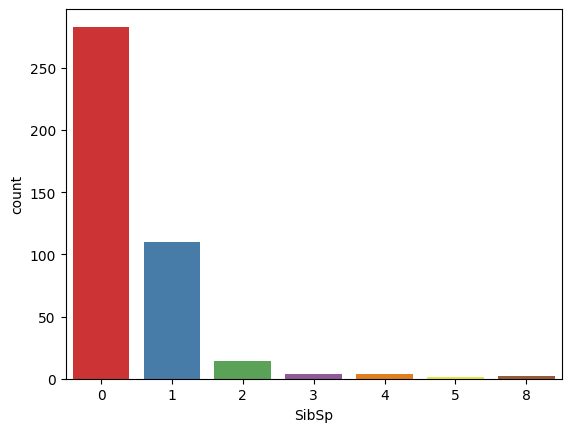

In [35]:
sns.countplot(x='SibSp', data=titanic_data, palette='Set1')

C:\Users\Nilima Sonawane\AppData\Local\Temp\ipykernel_10560\2133208089.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=titanic_data, palette='Set1')


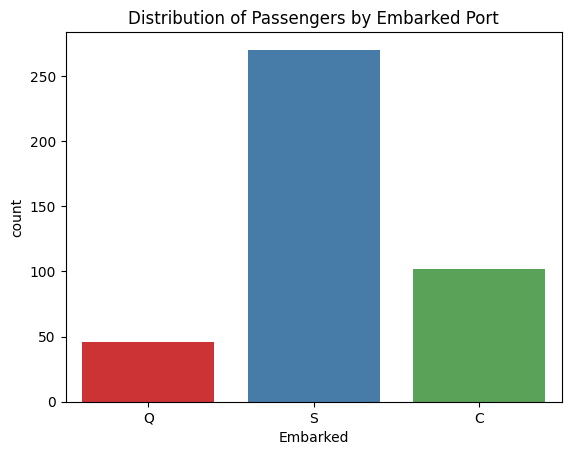

In [36]:
sns.countplot(x='Embarked', data=titanic_data, palette='Set1')
plt.title("Distribution of Passengers by Embarked Port")
plt.show()

In [37]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [38]:
X = titanic_data.drop('Survived', axis = 1)
y = titanic_data['Survived']

In [44]:
X_encoding = pd.get_dummies(X, columns=['Sex', 'Embarked'])

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_encoding, y, test_size=0.2, random_state=42)

In [41]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [42]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy : {accuracy:.2f}')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy : 1.00
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

